## Heart Desease Prediction using KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('heart.csv')
display(dataset.head(20))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
# Number of rows and columns is found by numpy shape function
print(dataset.shape)

(303, 14)


In [5]:
#Statistical description of given dataset is given by
display(dataset.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# class distribution
display(dataset.groupby('target').size())

target
0    138
1    165
dtype: int64

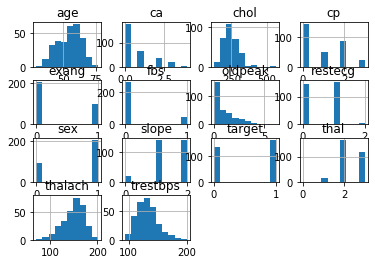

In [7]:
# histograms
dataset.hist()
plt.show()

In [8]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
print(X.shape)
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_validation = sc_X.transform(X_validation)

(303, 13)


In [43]:
KNN = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
kfold = model_selection.KFold(n_splits=5, random_state=seed)
cv_results = model_selection.cross_val_score(KNN, X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ('K-Nearest Neighbour', cv_results.mean(), cv_results.std())
print(msg)

K-Nearest Neighbour: 0.838946 (0.053813)


In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7704918032786885
[[20 10]
 [ 4 27]]
              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        30
         1.0       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



## Getting Input From Keyboard

In [54]:
# import pandas as pd
AGE = input("Enter age: ")
SEX = input("Enter sex: ")
CP = input("Enter Cp: ")
TESTBPS = input("Enter BPS: ")
CHOL = input("Enter Cholestrol: ")
FBS = input("Enter FBS: ")
RestECG = input("Enter Rest ECG: ")
THALACH = input("Enter ThalAch: ")
EXANG = input("Enter EXANG: ")
OLDPEAK = input("Enter Old Peak: ")
SLOPE = input("Enter slope: ")
CA = input("Enter CA: ")
THAL = input("Enter thal: ")

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

dataframe = {"age": AGE, "sex": SEX, "cp": CP, "testbps": TESTBPS,"chol":CHOL,"fbs":FBS,"restecg":RestECG,
             "thalach":THALACH,"exang":EXANG,"oldpeak": OLDPEAK,"slope":SLOPE,"ca": CA,"thal":THAL }

test_data = pd.DataFrame([dataframe])
display(pd.DataFrame([dataframe]))

test_array = test_data.to_numpy().astype(float)
print(test_array)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(test_array)
print(predictions)

print(predictions[0])
if(predictions[0]==1):
    print("He has heart desease")
else:
    print("He has no heart desease")

Enter age: 63
Enter sex: 1
Enter Cp: 3
Enter BPS: 145
Enter Cholestrol: 233
Enter FBS: 1
Enter Rest ECG: 0
Enter ThalAch: 150
Enter EXANG: 0
Enter Old Peak: 2.3
Enter slope: 0
Enter CA: 0
Enter thal: 1


,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]]
[1.]
1.0
He has heart desease
